In [1]:
import numpy
import matplotlib.pyplot
import scipy.special
import scipy.misc
%matplotlib inline


In [2]:
# neural network class definition
class neuralNetwork:
    # initialise the neural network
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # set number of nodes in each input, hidden, output layer
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # set learning rate
        self.learning_rate = learning_rate

        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)

        # link weight matrices, weight_input_hidden and weight_hidden_output
        # weights inside the arrays are weight_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc
        # init with values inside [-0.5, 0.5]
        # TODO incearca si cu numpy.random.normal
        self.weight_input_hidden = numpy.random.rand(
            self.hidden_nodes, self.input_nodes) - 0.5
        self.weight_hidden_output = numpy.random.rand(
            self.output_nodes, self.hidden_nodes) - 0.5

    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.weight_input_hidden, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate the signals into final output layer
        final_inputs = numpy.dot(self.weight_hidden_output, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        # error is (target - actual)
        output_errors = (targets - final_outputs)

        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.weight_hidden_output.T, output_errors)

        # update the weights
        self.weight_hidden_output += self.learning_rate * numpy.dot(output_errors * final_outputs * (1 - final_outputs),
                                                                    numpy.transpose(hidden_outputs))

        # update the weights
        self.weight_input_hidden += self.learning_rate * numpy.dot(hidden_errors * hidden_outputs * (1 - hidden_outputs),
                                                                   numpy.transpose(inputs))

    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.weight_input_hidden, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate the signals into final output layer
        final_inputs = numpy.dot(self.weight_hidden_output, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs


In [3]:
# Training

# Get dataset
data_file = open("mnist_dataset/mnist_train.csv", 'r')
data_list = data_file.readlines()
data_file.close()

# number of input, hidden, output nodes and epochs
input_nodes = 28 ** 2
hidden_nodes = 300
output_nodes = 10
epochs = 20
learning_rate = 0.02

# create instance of neural network
network = neuralNetwork(input_nodes=input_nodes,
                        hidden_nodes=hidden_nodes,
                        output_nodes=output_nodes,
                        learning_rate=learning_rate)

for epoch in range(epochs):
    for record in data_list:
        # Transform one of them to an image
        record = record.split(',')

        # image_array = numpy.asfarray(training_row[1:]).reshape(28, 28)
        # matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

        # Scale input to [0.01, 1.00]
        scaled_input = numpy.asfarray(record[1:]) / 255.0 * 0.99 + 0.01

        # Make output nodes
        nodes = 10
        targets = numpy.zeros(10) + 0.01
        targets[int(record[0])] = 0.99

        # Train.
        network.train(inputs_list=scaled_input, targets_list=targets)


In [4]:
# Testing.
data_file = open("mnist_dataset/mnist_test.csv", 'r')
data_list = data_file.readlines()
data_file.close()

verification = list()

for record in data_list:
    record = record.split(',')

    # Get the label
    correct_label = int(record[0])

    # Scale it for input
    scaled_input = numpy.asfarray(record[1:]) / 255.0 * 0.99 + 0.01

    # Get the result
    result = network.query(scaled_input)

    # Get the predicted label
    predicted_label = numpy.argmax(result)

    if predicted_label == correct_label:
        verification.append(1)
    else:
        verification.append(0)

print(f"Out of {len(verification)} images, the network correctly predicted {sum(verification)}")
print(
    f"Accuracy is {numpy.round(sum(verification) / len(verification) * 100, 2)}%")


Out of 10000 images, the network correctly predicted 9775
Accuracy is 97.75%


I think the number is... 3


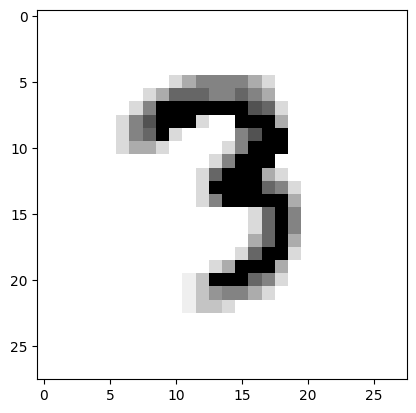

In [5]:
# Testing our own
image_array = matplotlib.pyplot.imread('three.png')
image_data = numpy.zeros(28 * 28)

counter = 0

# Convert to numpy array
for row in image_array:
    for pixel in row:
        image_data[counter] = 1 - pixel[0]
        counter += 1

image_data = (image_data * 0.99) + 0.01
matplotlib.pyplot.imshow(image_data.reshape(28, 28), cmap='Greys', interpolation='None')

print(f"I think the number is... {numpy.argmax(network.query(list(image_data)))}")
